# Data Science Project

* Name: Robert Cauvy
* Email: rcauvy@gmail.com


## TABLE OF CONTENTS 


- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# Business Problem

As the Covid-19 virus has spread throughout the world. Countries across the world are working to innoculate their populations and protect against future outbreaks it is essential to know which populations are at risk of not receiving the vaccines. This information would help public health organizations optimally target their resources to informing and educating individuals about the immunizations.

# OBTAIN

We will be using a dataset from Data Driven competition (drivendata.org/competitions/66/flu-shot-learning/data/) that contains approximately 26,707 survey responses relating to the H1N1 and seasonal flu to train various machine learning algorithms in order to predict how likely an individual is to receive a vaccine.

## Imports

In [94]:
## Data Handling
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

## Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline'
import seaborn as sns

## Settings
from IPython.display import display
%matplotlib inline
plt.style.use('seaborn-dark')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('max_rows', 100)

## Scikit-Learn
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn import set_config
set_config(display='diagram')

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, plot_confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [226]:
import missingno

In [62]:
# Data Source
# https://www.drivendata.org/competitions/66/flu-shot-learning/data/

In [211]:
## Reading csv data and loading into a DataFrame

features_df = pd.read_csv('data/training_set_features.csv',index_col=0)
features_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


The raw dataset contains 35 features and 26,707 instances.

### Data Glossary

**h1n1_concern** - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

**h1n1_knowledge** - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

**behavioral_antiviral_meds** - Has taken antiviral medications. (binary)

**behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms. (binary)

**behavioral_face_mask** - Has bought a face mask. (binary)

**behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer. (binary)

**behavioral_large_gatherings** - Has reduced time at large gatherings. (binary)

**behavioral_outside_home** - Has reduced contact with people outside of own household. (binary)

**behavioral_touch_face** - Has avoided touching eyes, nose, or mouth. (binary)

**doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor. (binary)

**doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor. (binary)

**chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

**child_under_6_months** - Has regular close contact with a child under the age of six months. (binary)

**health_worker** - Is a healthcare worker. (binary)

**health_insurance** - Has health insurance. (binary)

**opinion_h1n1_vacc_effective** - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

**opinion_h1n1_risk** - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

**opinion_h1n1_sick_from_vacc** - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

**opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

**opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

**opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

**age_group** - Age group of respondent.

**education** - Self-reported education level.

**race** - Race of respondent.

**sex** - Sex of respondent.

**income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.

**marital_status** - Marital status of respondent.

**rent_or_own** - Housing situation of respondent.

**employment_status** - Employment status of respondent.

**hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

**census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

**household_adults** - Number of other adults in household, top-coded to 3.

**household_children** - Number of children in household, top-coded to 3.

**employment_industry** - Type of industry respondent is employed in. Values are represented as short random character strings.

**employment_occupation** - Type of occupation of respondent. Values are represented as short random character strings.

In [7]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Most of the data fields are stored as floats. Confirming with the data glossary, some fields are actually binary or ordinal categories. The other data fields are stored as objects but most are also able to be encoded into ordinal and  nominal categorical variables.

<AxesSubplot:>

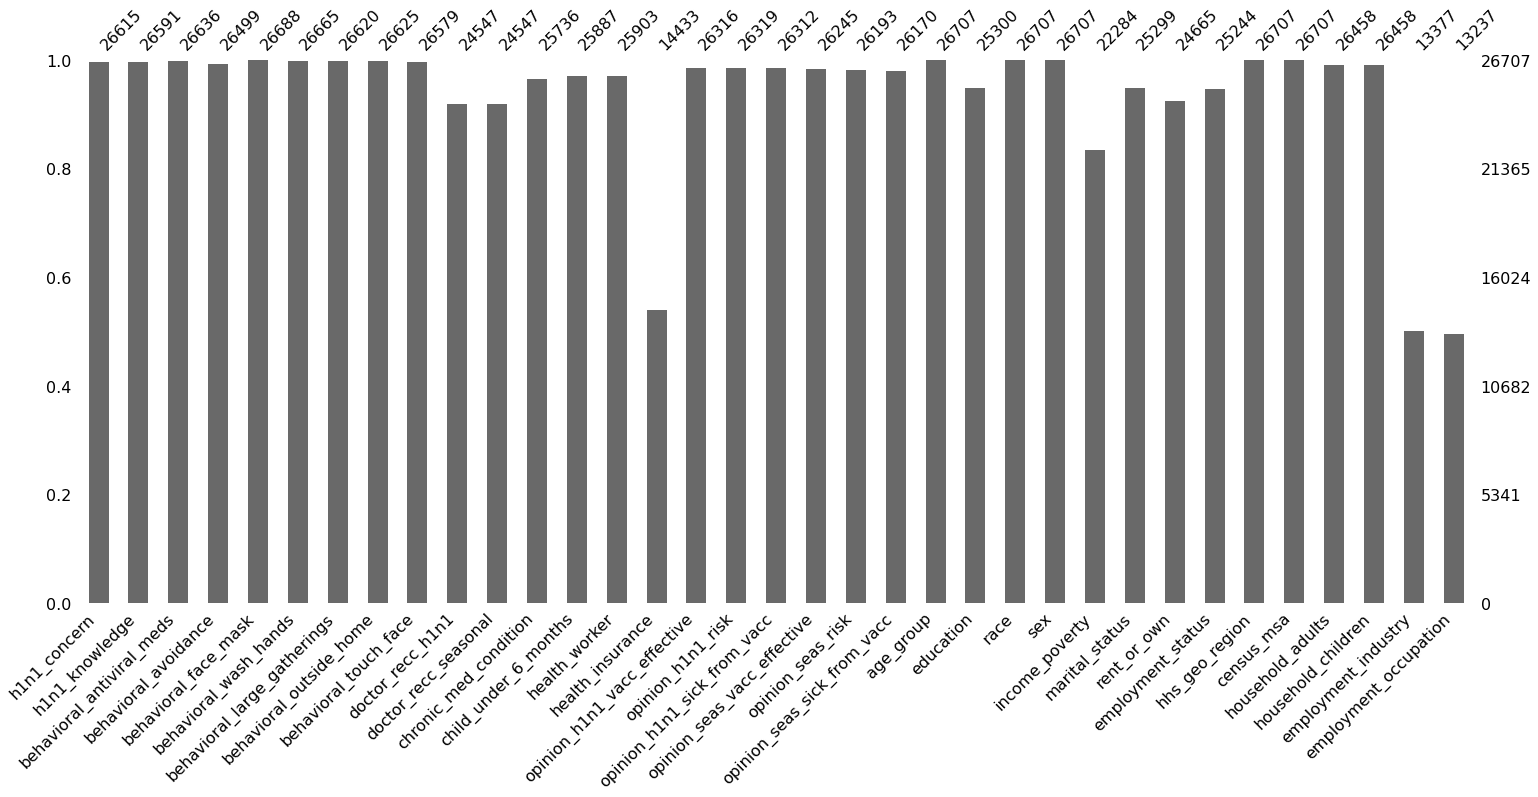

In [227]:
missingno.bar(features_df)

<AxesSubplot:>

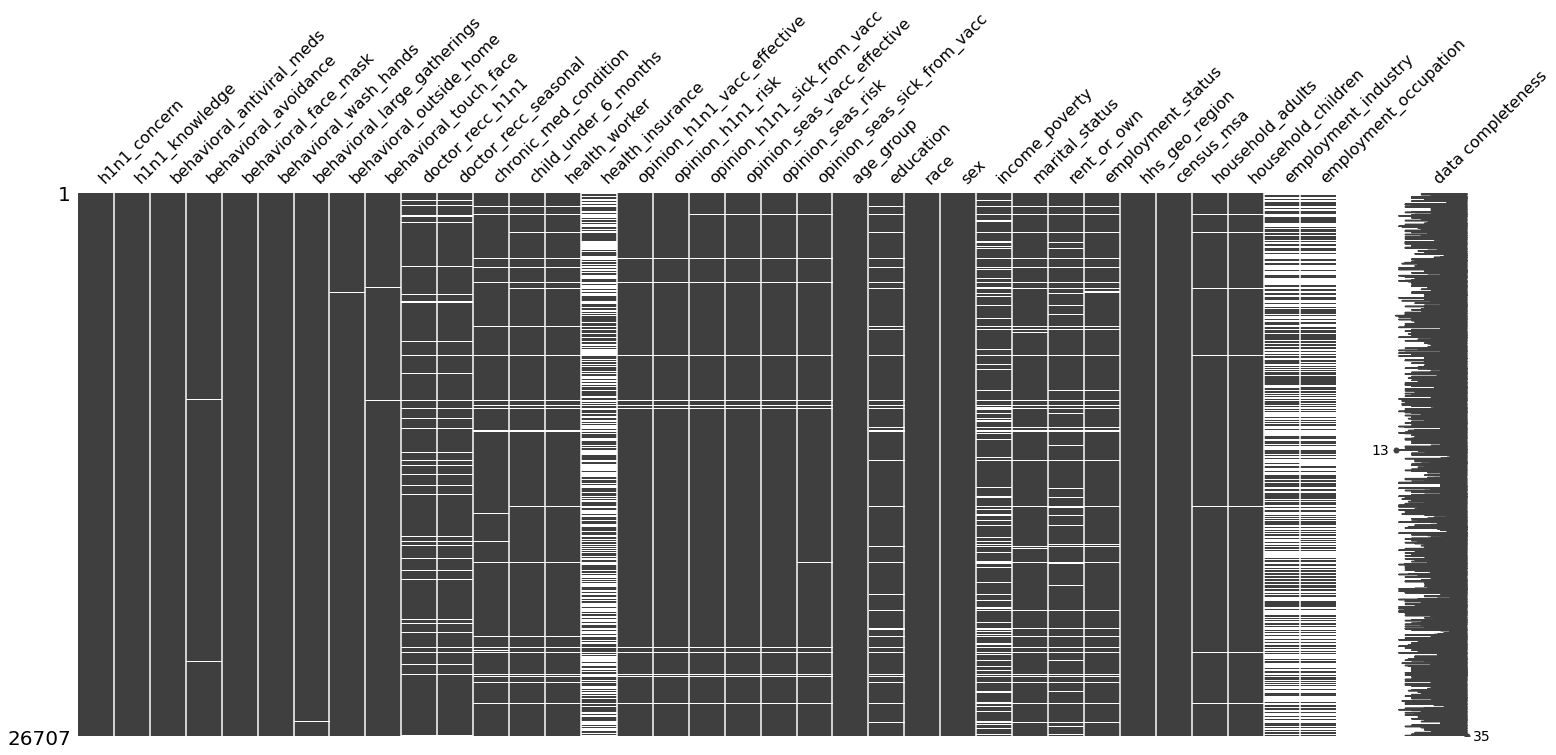

In [229]:
missingno.matrix(features_df, labels=True)

<AxesSubplot:>

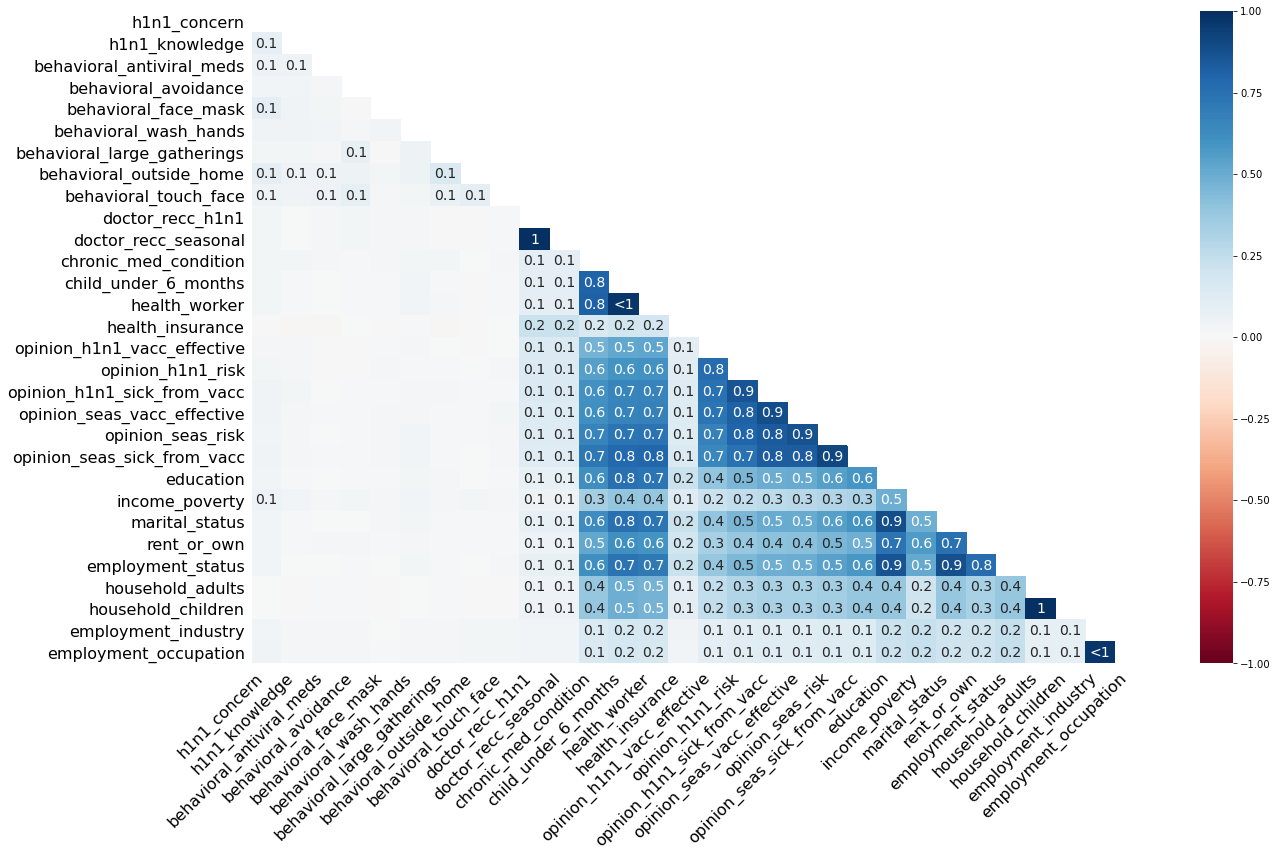

In [232]:
missingno.heatmap(features_df)

After inspecting the visualization, it is evident that the features missing the most responses are health insurance and employment details. Since these are categorical variables, we can create a new category and impute for the missing values. 

Instead of performing any manual updates to the remaining values, I will test different imputation methods as part of my modeling pipeline. </br></br> Potential methods would include:

Imputing the string "MISSING"
Imputing the most frequent value for string values
Using the mean, median, or mode for numeric datatypes
The benefit of including this step in a pipeline is that I will be able to include these different methods in a GridSearchCV as part of my hyperparameter turning steps.

In [ ]:
labels_df['h1n1'].isna().sum())

In [198]:
features_df.mean()

h1n1_concern                   1.618486
h1n1_knowledge                 1.262532
behavioral_antiviral_meds      0.048844
behavioral_avoidance           0.725612
behavioral_face_mask           0.068982
behavioral_wash_hands          0.825614
behavioral_large_gatherings    0.358640
behavioral_outside_home        0.337315
behavioral_touch_face          0.677264
doctor_recc_h1n1               0.220312
doctor_recc_seasonal           0.329735
chronic_med_condition          0.283261
child_under_6_months           0.082590
health_worker                  0.111918
health_insurance               0.879720
opinion_h1n1_vacc_effective    3.850623
opinion_h1n1_risk              2.342566
opinion_h1n1_sick_from_vacc    2.357670
opinion_seas_vacc_effective    4.025986
opinion_seas_risk              2.719162
opinion_seas_sick_from_vacc    2.118112
household_adults               0.886499
household_children             0.534583
dtype: float64

In [199]:
features_df2 = features_df.fillna(features_df.mean())

In [201]:
features_df2.isna().sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [203]:
features_df2.fillna(value='Unknown',inplace=True)
features_df2

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.00000,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Unknown,Unknown
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.00000,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.220312,0.329735,1.0,0.0,0.0,0.87972,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000,1.000000,1.0,0.0,0.0,0.87972,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Unknown,Unknown
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.87972,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.87972,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,Unknown,Unknown
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,1.0,1.00000,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.87972,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,Unknown,Not Married,Own,Unknown,lzgpxyit,"MSA, Not Principle City",0.0,0.0,Unknown,Unknown


In [64]:
labels_df = pd.read_csv('data/training_set_labels.csv',index_col=0)
labels_df

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1


In [230]:
labels_df['h1n1_vaccine'].isna().sum()

0

In [231]:
labels_df['seasonal_vaccine'].isna().sum()

0

Looks like there are target responses for every record in the dataset which is great. We won't have to drop any rows.

In [18]:
for col in list(labels_df.columns):
    print(labels_df[col].value_counts())

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


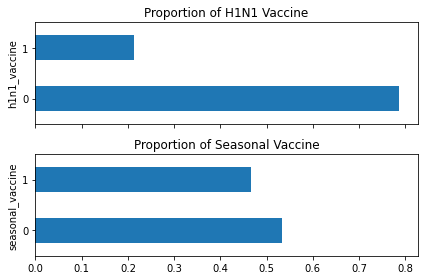

In [65]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

It looks like roughy half of people received the seasonal flu vaccine, but only about 20% of people received the H1N1 flu vaccine. In terms of class balance, we say that the seasonal flu vaccine target has balanced classes, but the H1N1 flu vaccine target has moderately imbalanced classes.

# SCRUB

Often times with survey collected data, there are some going to be missing responses. In order to process the data, each field will need to be evaluated to determine how missing values should be treated.

In [66]:
features_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

## Adjusting Features For Modeling

Data Conversions:

Binarizing categories: 
Ordinal categories: Any features with 't'/'f' values need to be converted to 1/0, respectively.
price: The price feature consists of string values; to use it properly, I will convert the values to the float datatype.
room_type: Converting to simpler string values.
neighbourhood_cleansed: The 'neighbourhood_cleansed' feature values are a single string of neighborhoods. I will split these strings into boolean features for each neighborhood. </br></br>

In [68]:
# Let's double-check that the rows between the features and the labels match up. 
# We don't want to have the wrong labels. 
# Numpy's assert_array_equal will error if the two arrays—the row indices of 
# the two data frames—don't match up.
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

The assertion ran, and nothing happened. That's good, it means there is no problem.

# EXPLORE

In [69]:
# Joining Features and Labels Dataframes
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [71]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


In [72]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [73]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


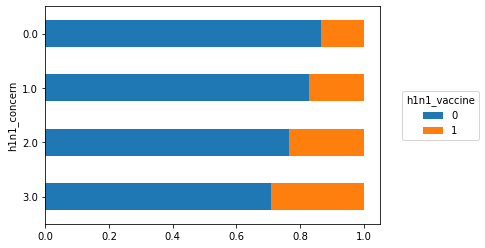

In [74]:

ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [75]:
# Let's factor this code into a function so we can use it on more variables.
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

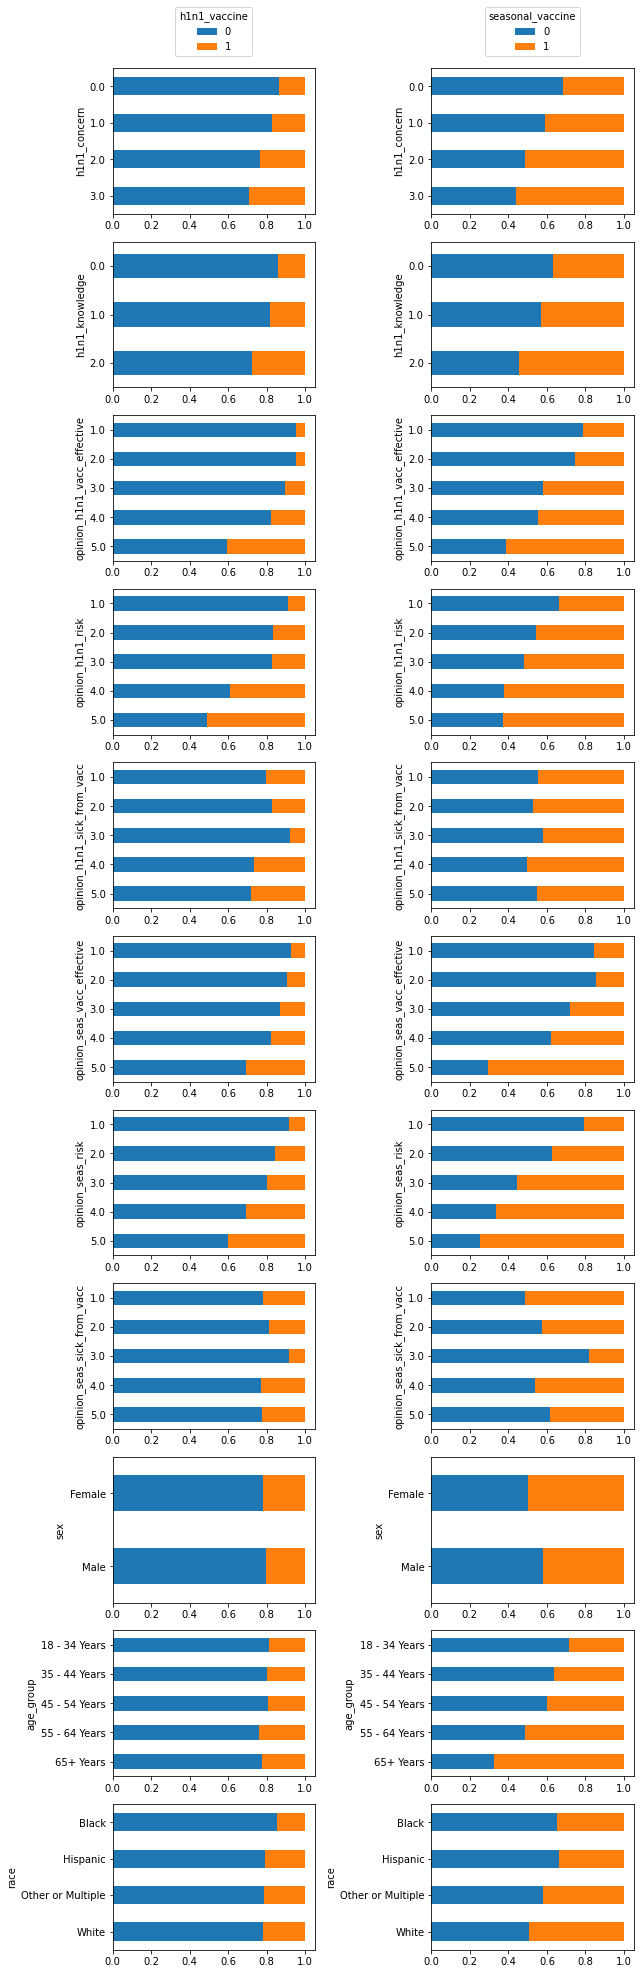

In [76]:
# Then, we'll loop through several columns and plot against both h1n1_vaccine and seasonal_vaccine.
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

It looks like the knowledge and opinion questions have pretty strong signal for both target variables.

# MODEL

### Perform Train-Test-Split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(
    features_df, labels_df, test_size =.25, random_state=42)
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25194,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,2.0,18 - 34 Years,12 Years,White,Female,NaN,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,1.0,1.0,NaN,NaN
14006,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,2.0,1.0,4.0,5.0,4.0,45 - 54 Years,Some College,White,Female,NaN,Married,NaN,Employed,lzgpxyit,"MSA, Not Principle City",2.0,1.0,fcxhlnwr,oijqvulv
11285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,kbazzjca,"MSA, Principle City",0.0,1.0,wlfvacwt,hfxkjkmi
2900,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,4.0,4.0,2.0,55 - 64 Years,College Graduate,White,Male,Below Poverty,Not Married,Own,Employed,mlyzmhmf,"MSA, Not Principle City",0.0,0.0,mcubkhph,ukymxvdu
19083,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,5.0,1.0,2.0,1.0,2.0,4.0,18 - 34 Years,NaN,White,Female,NaN,NaN,NaN,NaN,bhuqouqj,"MSA, Not Principle City",NaN,NaN,NaN,NaN


In [216]:
y_train['h1n1_vaccine'].value_counts()

0    15773
1     4257
Name: h1n1_vaccine, dtype: int64

In [218]:
y_train['seasonal_vaccine'].value_counts()

0    10638
1     9392
Name: seasonal_vaccine, dtype: int64

In [220]:
y_test['h1n1_vaccine'].value_counts()

0    5260
1    1417
Name: h1n1_vaccine, dtype: int64

In [219]:
y_test['seasonal_vaccine'].value_counts()

0    3634
1    3043
Name: seasonal_vaccine, dtype: int64

There is a slight class imbalance with the h1n1 target. The class weights are more even with the seasonal vaccine target. This can be evened out with SMOTE technique and class_weight hyperparameter in some of the models. 

### Imputing Missing Values and Scaling Pipelines

In [ ]:
# chain preprocessing into a Pipeline object
# Pipeline for numeric columns imputing the mean
num_tf_mean = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
    ])

In [ ]:
# Pipeline for numeric columns imputing the mode
num_tf_mode = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', MinMaxScaler())
    ])

In [ ]:
# Pipeline for numeric columns imputing the mode
num_tf_mode = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='Missing')),
    ('scaler', MinMaxScaler())
    ])

In [ ]:
# Pipeline for categorical columns where the first label will be dropped
cat_tf_dfirst = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse=False, drop='first'))
    ])

In [ ]:
# Pipeline for categorical columns where the no label will be dropped
cat_tf_dnone = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse=False))
    ])

In [ ]:
# create column transformer to do all the transformations
col_trans = ColumnTransformer(transformers=[
    ('num_mean', num_tf_mean, num_cols_mean + num_cols_filled),
    ('num_mode', num_tf_mode, num_cols_mode),
    ('cat_dfirst', cat_tf_dfirst, cat_drop_first),
    ('cat_dnone', cat_tf_dnone, cat_drop_none)
    ])

In [36]:
# We will be using logistic regression, a simple and fast linear model for classification problems. 
# Logistic regression is a great model choice for a first-pass baseline 
# model when starting out on a problem.

In [56]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [57]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('SS', StandardScaler()),
    ('SI', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(transformers = [
    ("numeric",numeric_preprocessing_steps, numeric_cols)],remainder = "drop"
)

In [58]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [59]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [78]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=42
)

In [79]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)
preds

CPU times: user 212 ms, sys: 28.2 ms, total: 240 ms
Wall time: 175 ms


[array([[0.9370031 , 0.0629969 ],
        [0.24217469, 0.75782531],
        [0.95826257, 0.04173743],
        ...,
        [0.18671901, 0.81328099],
        [0.9839001 , 0.0160999 ],
        [0.74724923, 0.25275077]]),
 array([[0.98139237, 0.01860763],
        [0.09231535, 0.90768465],
        [0.95327723, 0.04672277],
        ...,
        [0.09706328, 0.90293672],
        [0.58177139, 0.41822861],
        [0.56670581, 0.43329419]])]

In [80]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6368,0.062997,0.018608
12566,0.757825,0.907685
13996,0.041737,0.046723
12769,0.225619,0.971052
16915,0.074570,0.249598


In [81]:
roc_auc_score(y_eval, y_preds)

0.8317490240860408

### Feature Preprocessing

There are two important data preprocessing steps before jumping to the logistic regression:

Scaling: Transform all features to be on the same scale. This matters when using regularization, which we will discuss in the next section. We will use StandardScaler, also known as Z-score scaling. This scales and shifts features so that they have zero mean and unit variance.
NA Imputation: Logistic regression does not handle NA values. We will use median imputation, which fills missing values with the median from the training data, implemented with SimpleImputer.

## Encoding Categorical Features

In [205]:
X_train, X_test, y_train, y_test = train_test_split(features_df2, labels_df, random_state=42)

In [150]:
le = LabelEncoder()

In [151]:
le.fit(X_train['sex'])

LabelEncoder()

In [152]:
X_train['marital_status'] = X_train['marital_status'].fillna('Missing')

In [153]:
le.fit(X_train['marital_status'])

LabelEncoder()

In [155]:
X_train['sex'] = le.fit_transform(X_train['sex'])

In [156]:
X_train['marital_status'] = le.fit_transform(X_train['marital_status'])

In [165]:
X_train['income_poverty'] = X_train['income_poverty'].fillna('Missing')

In [166]:
X_train['education'] = X_train['education'].fillna('Missing')

In [163]:
X_train['age_group'] = le.fit_transform(X_train['age_group'])

In [167]:
X_train['education'] = le.fit_transform(X_train['education'])

In [168]:
X_train['income_poverty'] = le.fit_transform(X_train['income_poverty'])

In [170]:
cat_cols

['race',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [178]:
X_train['employment_occupation'].isna().sum()

10074

In [173]:
X_train['employment_status'] = X_train['employment_status'].fillna('Missing')

In [177]:
X_train['employment_industry'] = X_train['employment_industry'].fillna('Missing')

In [179]:
X_train['employment_occupation'] = X_train['employment_occupation'].fillna('Missing')

In [184]:
X_train['race'] = le.fit_transform(X_train['race'])

In [184]:
X_train['race'] = le.fit_transform(X_train['race'])

In [186]:
X_train['employment_status'] = le.fit_transform(X_train['employment_status'])

In [187]:
X_train['hhs_geo_region'] = le.fit_transform(X_train['hhs_geo_region'])

In [188]:
X_train['census_msa'] = le.fit_transform(X_train['census_msa'])

In [189]:
X_train['employment_industry'] = le.fit_transform(X_train['employment_industry'])

In [190]:
X_train['employment_occupation'] = le.fit_transform(X_train['employment_occupation'])

In [204]:
features_df2.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [107]:
from collections import defaultdict

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    features_df, 
    labels_df,
    test_size = .3,
    random_state=42)

X_train.shape, X_test.shape

((18694, 35), (8013, 35))

In [206]:
d = defaultdict(LabelEncoder)

In [207]:
# Encoding the variable
train_transformed = X_train.apply(lambda x: d[x.name].fit_transform(x))

#  Using the dictionary to encode future data
test_transformed = X_test.apply(lambda x: d[x.name].transform(x))

In [210]:
train_transformed

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25194,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,4,1,1,3,1,1,0,0,3,0,3,1,0,1,8,2,2,2,0,0
14006,3,1,0,2,0,2,0,0,0,0,2,2,2,0,2,2,1,0,3,5,4,2,3,3,0,3,0,2,0,6,0,3,2,5,12
11285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,3,1,0,2,2,3,0,0,1,0,0,4,1,0,2,18,8
2900,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,4,0,0,3,4,1,3,2,3,1,2,1,0,0,7,0,0,0,8,17
19083,3,1,2,2,0,2,2,2,2,2,2,1,1,1,1,5,0,1,0,1,4,0,4,3,0,3,2,2,3,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,3,1,0,0,0,2,0,0,2,0,0,0,0,0,2,4,1,1,3,1,0,3,3,3,1,1,1,0,1,9,1,0,0,0,0
5390,1,1,0,0,0,2,0,0,2,1,1,0,0,0,1,4,1,0,3,1,4,3,3,3,1,0,1,0,2,7,1,0,0,0,0
860,3,1,0,2,0,0,0,0,2,0,0,0,0,0,1,4,1,1,3,1,1,3,0,3,0,0,0,0,0,9,2,2,0,2,21


In [42]:
cat_cols = ['race','employment_status','hhs_geo_region', 'census_msa',
            'employment_industry','employment_occupation']

In [53]:
ohe_df = ohe.fit_transform(features_df[cat_cols]).toarray

ValueError: Input contains NaN

In [38]:
binary_cols = ['sex','marital_status']

In [37]:
ord_cols = ['age_group','education','income_poverty']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df,
    test_size=0.25, random_state=42)

### NA Imputation

Logistic regression does not handle NA values. We will use *median* imputation, which fills missing values with the median from the training data, implemented with SimpleImputer.

## Pipeline

In [44]:
numeric_preprocessing = Pipeline([('ss', StandardScaler()),
                                  ('si', SimpleImputer(strategy='median'))])

In [45]:
preprocessor = ColumnTransformer(transformers = [
    ("numeric", numeric_preprocessing, numeric_cols)])

In [ ]:
ohe_df1 = features_df.

## Estimator

In [46]:
# Ridge(L2) Regularization
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [ ]:
LogisticRegression()

### Hyperparameter Tuning

In [47]:
# GridsearchCV

## Initial Model

I'll start by creating initial vanilla models using both the SMOTEd data, and original unbalanced data with the class_weight='balanced' parameter.

### Evaluating Classification Models

In [222]:
def eval_clf_model(clf, X_test, y_test, X_train, y_train, score='macro',
               reports=True, labels=['Class 0', 'Class 1']):
    """Shows metrics and plots visualizations to interpret classifier model 
    performance.
    
    ***
    Args
    
    clf: classifier model to evaluate
    
    X_test: dataframe of test predictors
    
    y_test: dataframe of true target values
    
    X_train: dataframe (optional). Default is None. Provide training data if
    you want to evaluate performance on train versus test; otherwise only 
    test performance is evaluated.
    
    y_train: dataframe (optional). Default is None. Provide training data if
    you want to evaluate performance on train versus test; otherwise only 
    test performance is evaluated.
    
    scores: string (optional). Default is `std` to return standard F1, accuracy, 
    and recall scores. Use `macro` to return macro F1 and recall, and balanced
    accuracy. Scores are always returned, regardles of `reports` param.
    
    reports: boolean (optional). Default is True. Set to False to return only 
    scores, not actual classification reports.
    
    labels: list (optional). Provide a list of labels for the target class.
    """
    spacer = '*'*30
    
    # Get predictions 1 time only, since they will be used in a few spots
    test_preds = clf.predict(X_test)
    train_preds = clf.predict(X_train)
    
    # print classification reports
    if reports:
        print(spacer + ' Training Data ' + spacer)
        print(metrics.classification_report(y_train, train_preds))
        print()
        print(spacer + ' Test Data ' + spacer)
        print(metrics.classification_report(y_test, test_preds))
        print()
    
    # print scores from train and test next to each other for easy comparison
    print(spacer + ' Training Scores ' + spacer)

    # Train
    if score == 'std':
        train_f1 = np.round(metrics.f1_score(y_train, train_preds), 4)
        print(f"                  Training F1 = {train_f1}")
        train_r = np.round(metrics.recall_score(y_train, train_preds), 4)
        print(f"              Training Recall = {train_r}")
        train_acc = np.round(metrics.accuracy_score(y_train, train_preds), 4)
        print(f"            Training Accuracy = {train_acc}")
    elif score == 'macro':
        train_f1m = np.round(metrics.f1_score(y_train, train_preds, average='macro'), 4)
        print(f"            Training Macro F1 = {train_f1m}")
        train_rm = np.round(metrics.recall_score(y_train, train_preds, average='macro'), 4)
        print(f"        Training Macro Recall = {train_rm}")
        train_accbal = np.round(metrics.balanced_accuracy_score(y_train, train_preds), 4)
        print(f"   Training Balanced Accuracy = {train_accbal}")
    print()
    print(spacer + ' Test Scores ' + spacer)
    
    #Test
    if score == 'std':
        test_f1 = np.round(metrics.f1_score(y_test, test_preds), 4)
        print(f"                      Test F1 = {test_f1}")
        test_r = np.round(metrics.recall_score(y_test, test_preds), 4)
        print(f"                  Test Recall = {test_r}")
        test_acc = np.round(metrics.accuracy_score(y_test, test_preds), 4)
        print(f"                Test Accuracy = {test_acc}")
        
    elif score == 'macro':
        test_f1m = np.round(metrics.f1_score(y_test, test_preds, average='macro'), 4)
        print(f"                Test Macro F1 = {test_f1m}")
        test_rm = np.round(metrics.recall_score(y_test, test_preds, average='macro'), 4)
        print(f"            Test Macro Recall = {test_rm}")
        test_accbal = np.round(metrics.balanced_accuracy_score(y_test, test_preds), 4)
        print(f"       Test Balanced Accuracy = {test_accbal}")
    print()
    print(spacer + ' Differences ' + spacer)
    
    #Diffs
    if score == 'std':
        print(f"               Train-Test F1 Diff = {test_f1 - train_f1}")       
        print(f"           Train-Test Recall Diff = {test_r - train_r}")       
        print(f"         Train-Test Accuracy Diff = {test_acc - train_acc}")     
    elif score == 'macro':  
        print(f"         Train-Test Macro F1 Diff = {test_f1m - train_f1m}")      
        print(f"     Train-Test Macro Recall Diff = {test_rm - train_rm}")       
        print(f"Train-Test Balanced Accuracy Diff = {test_accbal - train_accbal}")
    
    print()
    print(spacer + ' Graphs for Test ' + spacer)
    # plot graphs
    auc = np.round(metrics.roc_auc_score(y_test, test_preds), 2)
    ap = np.round(metrics.average_precision_score(y_test, test_preds), 2)
    
    fig, [ax1, ax2, ax3] = plt.subplots(figsize=[10, 3], nrows=1, ncols=3)
    plt.tight_layout(pad=2.5)
    metrics.plot_confusion_matrix(clf, X_test, y_test, normalize='true', 
                              display_labels=labels, cmap='Reds', ax=ax1)
    metrics.plot_roc_curve(clf, X_test, y_test, ax=ax2)
    ax2.legend(loc='best', fontsize='small', labels=[f'AUC: {auc}'])
    
    metrics.plot_precision_recall_curve(clf, X_test, y_test, ax=ax3)
    ax3.legend(loc='best', fontsize='small')
    ax3.legend(loc='best', fontsize='small', labels=[f'AP: {ap}'])
    plt.show();
    
    return None

In [223]:
'''Name: Classification
Description: Functions designed to assist with the creation and evaluation of classification modeling.
By Ben McCarty (bmccarty505@gmail.com)'''

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics


## Generating scores for later comparisons
def model_scores(model, X_train, y_train, X_test, y_test):
    """[summary]
    Args:
        model ([type]): [description]
        X_train ([type]): [description]
        y_train ([type]): [description]
        X_test ([type]): [description]
        y_test ([type]): [description]
    Returns:
        [type]: [description]
    """

    prob_train = model.predict_proba(X_train)
    prob_test = model.predict_proba(X_test)

    base_train_ll = metrics.log_loss(y_train, prob_train).round(2)
    base_test_ll = metrics.log_loss(y_test, prob_test).round(2)

    base_train_score = model.score(X_train, y_train).round(2)
    base_test_score = model.score(X_test,y_test).round(2)


    return base_train_score, base_test_score, base_train_ll, base_test_ll

##
def plot_comparison_hist(data, feature, target = None, bins = 'auto', alt_name = None, save_fig=False):
    """[summary]
    Args:
        data ([type]): [description]
        feature ([type]): [description]
        target ([type], optional): [description]. Defaults to None.
        bins (str, optional): [description]. Defaults to 'auto'.
        alt_name ([type], optional): [description]. Defaults to None.
        save_fig (bool, optional): [description]. Defaults to False.
    """

    feature_name = feature.replace("_", " ").replace("'", "").title()
    
    if len(list(data[feature].unique())) > 10:
        ax = sns.histplot(data=data, x= data[feature] \
                           .value_counts(ascending=False),
                          hue = target, bins=bins)
    else:
        ax = sns.histplot(data=data, x= feature, hue = target, bins = bins)
    
    if list((data[feature].unique())) == [0,1]:
        plt.xticks([0, 1], ['No', 'Yes'])

    if alt_name == None:
        ax.set(title = f'Total Counts of Reviews for {feature_name}',
            xlabel = feature_name)
    else:
        ax.set(title = f'Total Counts of Reviews for {alt_name}',
            xlabel = alt_name)
        
    ax.legend(('Less than 4', '4 or Greater'),fontsize= 'medium', 
              title = 'Rating', title_fontsize = 'large', loc = 0);

    if save_fig == True:
        plt.savefig(f'{feature}_importance.png');

##
def plot_comparison_count(data,feature, target = 'review_scores_rating',
                    save_fig=False, print_target = None):
    """[summary]
    Args:
        data ([type]): [description]
        feature ([type]): [description]
        target (str, optional): [description]. Defaults to 'review_scores_rating'.
        save_fig (bool, optional): [description]. Defaults to False.
        print_target ([type], optional): [description]. Defaults to None.
    """

    feature_name = feature.replace("_", " ").title()
    
    
    if len(list(data[feature].unique())) > 10:
        ax = sns.countplot(data=data, x= feature,
                          hue = target)
    else:
        ax = sns.countplot(data=data, x= feature, hue = target)
    
    if list((data[feature].unique())) == [0,1]:
        plt.xticks([0, 1], ['No', 'Yes'])

    if print_target != None:
        target_name = target.replace("_", " ").title()
        ax.set(title = f'Comparing {feature_name} by {target_name}',
            xlabel = feature_name,ylabel = f'Count of {target_name}')
    else:
        ax.set(title = f'Comparing {feature_name} by Number of Reviews ',
            xlabel = feature_name,ylabel = f'Number of Reviews')


    ax.legend(('Less than 4', '4 or Greater'),fontsize= 'medium', 
              title = 'Rating', title_fontsize = 'large', loc = 0);

    if save_fig == True:
        plt.savefig(f'{feature}_importance.png');

##
def plot_depths(fitted_model, verbose = False):
    """[summary]
    Args:
        fitted_model ([type]): [description]
        verbose (bool, optional): [description]. Defaults to False.
    Returns:
        [type]: [description]
    """

    depths = []

    for i in fitted_model.estimators_:
        depths.append(i.get_depth())

    print(f'\nThe maximum depth is: {np.max(depths)}\n')

    ax = sns.histplot(depths)

    ax.set(title = 'Tree Depths Used in RandomForestClassifier',
           xlabel = 'Depths', ylabel = 'Number of Trees')
    ax.axvline(np.mean(depths), label = f'Mean: {np.mean(depths):.0f}',
               color='k')

    plt.legend(loc=0);
    plt.show
    
    if verbose == True:
        return depths

##
def plot_importances(model, X_train_df, count = 10, return_importances = False):
    """Given a fitted classification model with feature importances, creates a 
    horizontal barplot of the top 10 most important features.
    Args:
        model (SKlearn model): pre-fit classification model
        X_train_df (pd.DataFrame: DF used for modeling - provides index to pair with values
        count (int, optional): Top # importances. Defaults to 10.
        return_importances (bool, optional): If True, returns the feature importances as a Series. Defaults to False.
    Returns:
        - Prints bar chart always
        If return_importances = True:
            pd.Series: feature importances as a Pandas 
    """    

    col_names =  list(map(lambda x: x.title().replace('_', ' '), list(X_train_df.columns)))

    importances = pd.Series(model.feature_importances_, index= col_names)

    fig, ax = plt.subplots()
    ax = importances.sort_values(ascending = True)[-count:].plot(kind= 'barh')
    ax.set(title=f'Top {count} Most Important Predictors', xlabel='Importance')
    ax.set_facecolor('0.9')
    fig.set_facecolor('0.975')
    
    plt.savefig(f'./img/feature_importances.png',transparent=False, bbox_inches='tight', dpi=150)

    plt.show()
    plt.close()

    if return_importances == True:
        return importances


def cf_rpt_results(y_true, y_preds, metric):

        ## Getting clf rpt as dict -> df
    cr_df = pd.DataFrame(metrics.classification_report(y_true, y_preds,
                                                   output_dict=True))

    ## Rounding all values to 2 decimals
    cr_df = cr_df.applymap(lambda x: round(x, 2))

    ## adding blank col b/t 1, "accuracy"
    cr_df.insert(2,column=" ", value=" ")
    
    # Transposing df
    cr_df = cr_df.T

    ## Converting 'accuracy' values to strings to replace values w/ blank strings
    for value in range(len(cr_df.loc['accuracy':,])):
        cr_df.loc['accuracy'][value] = round(cr_df.loc['accuracy'][value],2)
        cr_df.loc['accuracy'][value] = str(cr_df.loc['accuracy'][value])

    ## Converting remaining values back to floats
    cr_df.loc['accuracy'][2:4] = pd.to_numeric(cr_df.loc['accuracy'][2:4])

    ## Copying "support" value from macro average
    cr_df.loc['accuracy','support'] = cr_df.loc['macro avg','support']

    cond = [metric == 'accuracy',
            metric == 'precision',
            metric == 'recall',
            metric == 'f1',
            metric == 'balanced accuracy',
            metric == 'average precision',
            metric == 'balanced recall']

    choice = [cr_df.loc['accuracy'][2],
              cr_df.loc['1'][1],
              cr_df.loc['1'][0],
              cr_df.loc['1'][2],
              cr_df.loc['macro avg'][1],
              cr_df.loc['macro avg'][0],
              cr_df.loc['macro avg'][1]
    ]

    return np.select(cond, choice, None)


##
def evaluate_classification(model,X_train, y_train, X_test, y_test,
                            metric = 'accuracy', verbose = True, train_clf_rpt = False,
                            cmap='Blues',normalize='true',figsize=(10,4), labels=None):                 
    """[summary]
    
    Adapted from:
    https://github.com/jirvingphd/Online-DS-FT-022221-Cohort-Notes/blob/master/Phase_3/topic_25_logistic_regression/topic_25_pt2_LogisticRegression_titanic-v2-SG.ipynb
    
    Args:
        model (model): Trained classification model
        X_train (Dataframe): X-train data
        y_train (Dataframe): y-train data
        X_test (Dataframe): X-test data
        y_test (Dataframe): y-test data
        metric (string): Text string to specify preferred performance metric
        verbose (bool, optional): 0, 1, 2. Defaults to True.
        labels (string, optional): Classes for predictions. Defaults to None.
        cmap (str, optional): Color pallette for confusion matrix. Defaults to 'Blues'.
        normalize (str, optional): Option for normalizing confusion matrix. Defaults to 'true'.
        figsize (tuple, optional): Sizing for ROC-AUC plot. Defaults to (10,4).
    Returns:
        [type]: [description]
    """                    

    print('\n|' + '----'*8 + ' Classification Metrics ' + '---'*11 + '--|\n')

    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    prob_train = model.predict_proba(X_train)
    prob_test = model.predict_proba(X_test)  

    ### --- Scores --- ###

    train_score = cf_rpt_results(y_train, y_hat_train, metric)
    test_score = cf_rpt_results(y_test, y_hat_test, metric)

    print(f'Training {metric} score: {train_score}')
    print(f'Testing {metric} score: {test_score}')

    if verbose == 1:
        
        difference = train_score - test_score
        
        if difference > 0:
            print(f"\t- The training score is larger by {np.abs(difference):.2f} points.")
        elif difference < 0:
            print(f"\t- The training score is smaller by {np.abs(difference):.2f} points.")
        else:
            print(f"\t- The scores are the same size.")

    else:
        pass

    ### --- Log Loss --- ###

    print(f"\nTraining data log loss: {metrics.log_loss(y_train, prob_train):.2f}")
    print(f"Testing data log loss: {metrics.log_loss(y_test, prob_test):.2f}\n")

    if verbose == 2:
        if metrics.log_loss(y_test, prob_test) >= .66:
            print('\tThe log loss for the testing data is high, indicating a poorly-performing model.')
        elif metrics.log_loss(y_test, prob_test) <= .33:
            print('\tThe log loss for the testing data is low, indicating a well-performing model.')
        else:
            print('\tThe log loss for the testing data is moderate, indicating a weakly-performing model.')
    else:
        pass

    ### --- Clasification Reports --- ###
    
    print('\n\n|' + '----'*7 + ' Classification Report - Testing Data ' + '---'*8 + '-|\n')
    print(metrics.classification_report(y_test, y_hat_test,
                                    target_names=labels))

    fig, ax = plt.subplots(ncols=2, figsize = figsize)
    metrics.plot_confusion_matrix(model, X_test,y_test,cmap=cmap,
                            normalize=normalize, display_labels=labels,
                            ax=ax[0])

    curve = metrics.plot_roc_curve(model, X_test,y_test,ax=ax[1])
    curve.ax_.grid()
    curve.ax_.plot([0,1],[0,1], ls=':')
    plt.tight_layout()
    plt.show()
    plt.close()

    if train_clf_rpt == True:
        print('\n|' + '----'*7 + ' Classification Report - Training Data ' + '---'*8 + '|\n')
        print(metrics.classification_report(y_train, y_hat_train,
                                    target_names=labels))

        fig, ax = plt.subplots(ncols=2, figsize = figsize)
        metrics.plot_confusion_matrix(model, X_train,y_train,cmap=cmap,
                                normalize=normalize, display_labels=labels,
                                ax=ax[0])

        curve = metrics.plot_roc_curve(model, X_train,y_train,ax=ax[1])
        curve.ax_.grid()
        curve.ax_.plot([0,1],[0,1], ls=':')
        plt.tight_layout()
        plt.show()
        plt.close()

    return None


def plot_log_odds(model, dataframe, num_feats=3):
    """[summary]
    Args:
        model ([type]): [description]
        dataframe ([type]): [description]
        num_feats (int, optional): [description]. Defaults to 3.
    Returns:
        [type]: [description]
    """    """[summary]
    Args:
        model ([type]): [description]
        dataframe ([type]): [description]
    Returns:
        [type]: [description]
    """    """[summary]
    Args:
        model ([type]): [description]
        dataframe ([type]): [description]
    Returns:
        [type]: [description]
    """

    ## Collecting coefficients for each feature as a Series
    lr_coefs = pd.Series(model.coef_.flatten(), index=dataframe.columns)
    lr_coefs.sort_values(ascending=False, inplace=True)

    ## Converting top/bottom 5 values into a Series
    log_odds = pd.concat([lr_coefs.head(num_feats), lr_coefs.tail(num_feats)])

    ## Formatting index labels to become visualization labels
    new_labels_list = [i.replace('_', ' ').title() for i in list(log_odds.index)]

    ## Creating a dictionary to replace the old lables with the new ones
    new_labels_dict = { k:v for (k,v) in zip(log_odds.index, new_labels_list)}

    ## Renaming Series index
    log_odds = log_odds.rename(new_labels_dict)
    log_odds.sort_values(inplace=True)
    ## Visualizing log-odds
    fig, ax = plt.subplots(figsize=(8,5))

    ax = log_odds.plot(kind='barh', ax=ax)
    ax.axvline(linestyle = '-', c='k')
    ax.set_xlabel('Coefficient')
    ax.set_ylabel('Feature Name')
    fig.suptitle(f'Top & Bottom {num_feats} Features')
    ax.set_facecolor('0.9')
    fig.set_facecolor('0.975')
    plt.tight_layout()

    plt.savefig('./img/logreg_coefs.png',transparent=False, bbox_inches='tight',
            dpi=150)
    
    plt.show()
    plt.close()

    return None

SyntaxError: invalid syntax (<ipython-input-223-857deefaf22c>, line 1)

## Logistic Regression

Here I create two different logistic regression models without regularization, testing whether letting sklearn address class imbalance or using SMOTEd data is a better result.



Using the default solver  'lbfgs' switching to the 'saga' solver, which worked better for this larger dataset.

In [ ]:
# unSMOTEd data
ub_lr = LogisticRegression(C=1e12, class_weight='balanced', max_iter=500, 
                           solver='saga')

lr_ub.fit(X_train_df[v1_cols], y_train)

dstools.eval_clf_model(lr_ub, X_test_df[v1_cols], y_test, X_train_df[v1_cols], 
               y_train, labels=labels)

In [ ]:

# SMOTEd data
lr_sm = LogisticRegression(C=1e12, max_iter=500, solver='saga')

lr_sm.fit(X_train_sm[v1_cols], y_train_sm)

dstools.eval_clf_model(lr_sm, X_test_df[v1_cols], y_test, X_train_sm[v1_cols], 
               y_train_sm, labels=labels)

In [ ]:
# perform cross validation to get average scores
lr_ub_scores = cross_val_score(lr_ub, X_train_df[v1_cols], y_train, 
                               scoring='f1_macro', cv=5, n_jobs=-1)

lr_sm_scores = cross_val_score(lr_sm, X_train_sm[v1_cols], y_train_sm, 
                               scoring='f1_macro', cv=5, n_jobs=-1)
print('*** sklearn macro f1 ***')
print(lr_ub_scores)
print(lr_ub_scores.mean())
print()
print('*** SMOTE macro f1 ***')
print(lr_sm_scores)
print(lr_sm_scores.mean())

In [42]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_test)
preds

NameError: name 'full_pipeline' is not defined

## Random Forest 

Starting with max_depth =10 because the default parameter of None still resulted in a very overfit model.

In [ ]:
# unSMOTEd data
rf_ub = RandomForestClassifier(class_weight='balanced', n_jobs=-1, 
                               max_depth=10)

rf_ub.fit(X_train_df[v1_cols], y_train)

dstools.eval_clf_model(rf_ub, X_test_df[v1_cols], y_test, X_train_df[v1_cols], 
               y_train, labels=labels)

In [ ]:
# SMOTEd data
rf_sm = RandomForestClassifier(n_jobs=-1, max_depth=10)

rf_sm.fit(X_train_sm[v1_cols], y_train_sm)

dstools.eval_clf_model(rf_sm, X_test_df[v1_cols], y_test, X_train_sm[v1_cols], 
               y_train_sm, labels=labels)

In [ ]:
# cross validate
rf_ub_scores = cross_val_score(rf_ub, X_train_df[v1_cols], y_train, 
                               scoring='f1_macro', cv=5, n_jobs=-1)

rf_sm_scores = cross_val_score(rf_sm, X_train_sm[v1_cols], y_train_sm, 
                               scoring='f1_macro', cv=5, n_jobs=-1)
print('*** sklearn macro f1 ***')
print(rf_ub_scores)
print(rf_ub_scores.mean())
print()
print('*** SMOTE macro f1 ***')
print(rf_sm_scores)
print(rf_sm_scores.mean())

## Hyperparameter Tuning With GridSearch 

### LogReg

Although I chose F1 macro as my primary statistic, recall would also be a good choice, since I definitely want my model to find as many of the ___ class as possible.

I did a grid search optimizing for both statistics, and compared, to see how different the 'best' parameters would be.

In [ ]:
# Logistic regression, optimized for f1_macro
lr = LogisticRegression(max_iter=600, class_weight='balanced')

param_grid = {
    'C':[0.01, 1, 100, 1e6],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

gs_lr = GridSearchCV(lr, param_grid, scoring='f1_macro', n_jobs=-1,  verbose=True)

if rerun_gridsearch:
    gs_lr.fit(X_train_df[v1_cols], y_train)

    print(gs_lr.best_estimator_)
    print(gs_lr.best_score_)

In [ ]:
# Logistic regression, optimized for recall_macro
lr = LogisticRegression(max_iter=600, class_weight='balanced')

param_grid = {
    'C':[0.01, 1, 100, 1e6],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

gs_lr = GridSearchCV(lr, param_grid, scoring='recall_macro', n_jobs=-1,  
                     verbose=True)

if rerun_gridsearch:
    gs_lr.fit(X_train_df[v1_cols], y_train)

    print(gs_lr.best_estimator_)
    print(gs_lr.best_score_)

In [ ]:
# Check out results on test for recall optizmiation
lr = LogisticRegression(C=1, class_weight='balanced', max_iter=600, 
                        penalty='l1', solver='liblinear')
lr.fit(X_train_df[v1_cols], y_train)

dstools.eval_clf_model(lr, X_test_df[v1_cols], y_test, X_train_df[v1_cols], 
               y_train, labels=labels)

In [ ]:

# Check out results on test for F1 optizmiation
lr = LogisticRegression(C=1, class_weight='balanced', max_iter=600, 
                        penalty='l2', solver='saga')
lr.fit(X_train_df[v1_cols], y_train)

dstools.eval_clf_model(lr, X_test_df[v1_cols], y_test, X_train_df[v1_cols], 
               y_train, labels=labels)

### RandomForest

In [ ]:
# Random Forest, optimized for f1_macro
rf = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth': [5, 10, 30],
    'min_samples_split': [1, 5, 20],
    'min_impurity_decrease': [0, 0.01, 0.02],
    'max_features': [10, 20],
    'max_leaf_nodes': [6000, 2000, 500]
}

gs_rf = GridSearchCV(rf, param_grid, scoring='f1_macro', n_jobs=-1,  
                     verbose=True)

if rerun_gridsearch:
    gs_rf.fit(X_train_df[v1_cols], y_train)

    print(gs_rf.best_estimator_)
    print(gs_rf.best_score_)

In [ ]:
# Review model performance for a model with these optimal params
rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', 
                            max_depth=30, max_features=10, 
                            max_leaf_nodes=2000, min_samples_split=20)


rf.fit(X_train_df[v1_cols], y_train)

dstools.eval_clf_model(rf, X_test_df[v1_cols], y_test, X_train_df[v1_cols], 
               y_train, labels=labels)

In [ ]:
# Review model performance for a model with optimal params that weren't the
# max in the grid search.
rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', 
                            max_features=10)


rf.fit(X_train_df[v1_cols], y_train)

dstools.eval_clf_model(rf, X_test_df[v1_cols], y_test, X_train_df[v1_cols], 
               y_train, labels=labels)

In [ ]:
# How about trying another grid search with just max_depth and criterion?
rf = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth': [5, 10, 30]
}

gs_rf = GridSearchCV(rf, param_grid, scoring='f1_macro', n_jobs=-1,  
                     verbose=True)

if rerun_gridsearch:
    gs_rf.fit(X_train_df[v1_cols], y_train)

    print(gs_rf.best_estimator_)
    print(gs_rf.best_score_)

In [ ]:
https://scikit-learn.org/stable/modules/feature_selection.html)

## XGBoost

# iNTERPRET

I used the coefficients from the logistic regression model, since they allowed me to determine interpretable odds for predictors of both hesitancy and optimisim.

I did also initially review the feature importances and permutation importances from the random forest model. However, only some of these agreed with each other, and with the logistic regression coefficients.

I reviewed which coefficients 2 out of 3 methods agreed on being in the top 30, and considered dropping those logistic regression coefficients that the random forest model didn't agree were as important. However, the random forest model's importances did not seem especially stable, and only AGE and EEDUC stood out from others, which were both predictors of optimism according to logistic regression. I ultimately decided to make my conclusions and recommendations based solely on the logistic regression coefficients, because I think this model type is less prone to making somewhat arbitrary decisions based on randomness, and performed the most consistently throughout the modeling process.

See the Extra section at the end of this notebook for the random forest importance work.

In [82]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
print(classification_report(y_test, test_preds))

NameError: name 'model' is not defined

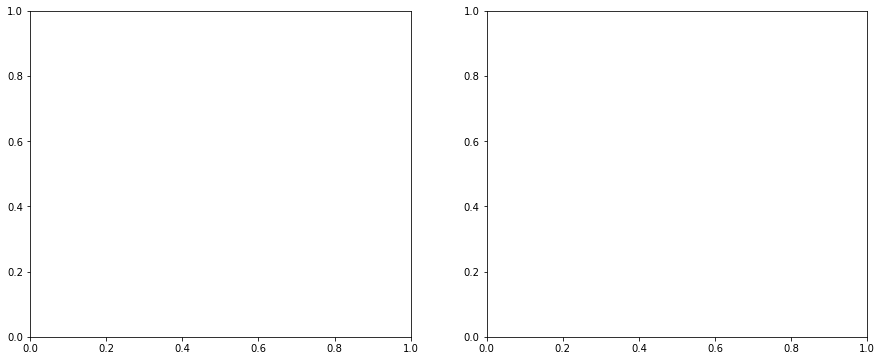

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    
plot_confusion_matrix(model, X_train, y_train, ax=ax[0])
plot_confusion_matrix(model, X_test, y_test, ax=ax[1])
ax[0].grid(False)
ax[1].grid(False)

# CONCLUSIONS & RECOMMENDATIONS

Understanding the Hesitant Population
Individually, no single one of the top predictors of hesitancy stands out as especially meaningful. When we look at characteristics that predicted a greater percentage of hesitant respondents, it was the rarest categories that had the highest percentage of hesitancy. Even if it were feasible to create targeted campaigns for people with over 3 children, or people who live in mobile homes, or people who have generally had difficulty meeting expenses, such approaches would be focusing on a fairly small segment of the overall population.

However, what if we consider these characteristics together, and also with the understanding that the top reason for hesitancy across the board is concern about side effects?

Heads of household with more children to care for, or who struggle to make ends meet in terms of expenses and food--especially if they already live in semi-permanent housing--may not feel they can risk experiencing side effects from the vaccine, which if moderate or severe, could mean having to miss work or not being able to meet household responsibilities for up to several days.

Given the characteristics of the most hesitant groups, I believe people are primarily worried about side effects they and their families wouldn't be able to afford, as opposed to simply not wanting to feel ill. This theory is supported by the top predictors of vaccine optimism, which outline a situation on the far opposite end of the economic spectrum: higher level of education, higher income, and more likely to have been able to work remotely. This demographic may be more financially secure, and feel better able to afford missing work or household responsibilities if they experience side effects.

It's also worth noting that the predictors I attempted to engineer to represent political leanings (household being in a "Red" versus "Blue" state, or being in a metropolitan area, which tend to be Blue) didn't make it into the top predictors of hesitancy or optimism. It's possible we would see different results if we had data on the specific household's political affiliations, but this data did not support the idea that vaccine hesitancy is largely a partisan issue.

Reasons for Hesitancy
The top 5 reasons cited for hesitancy across the hesitant group were:

Concerned about side effects
Plan to wait and see if it's safe -- may get it later
Don't trust the vaccines
Don't trust the government
Don't believe I need it
Of people who said they didn't believe they needed the vaccine, top sub-reasons why were:

Not in a high risk group
Don't believe COVID is a serious illness
When we look at the top 5 reasons in the groups with the highest percentage of hesitancy, there is almost no difference compared to the groups with average percentage of hesitancy. The only group that differed was households who said it had been very difficult to meet household expenses, where the number 5 reason was "Don't believe it will work".

Approaches that address the top 5 hesitancy reasons should produce results across the board.

Recommendations for Further Initiatives to Encourage Vaccination
Generate data to understand the true risk of moderate to severe side effects
Currently, the top result of Googling "COVID vaccine side effects" is this CDC webpage. Although factually accurate, and I believe genuinely designed to educate the public on what to expect, the warnings can seem scary for a reader. Without knowing how likely they are to experience side effects, many people may assume the "worst case scenario", especially if most of the anecdotal stories they've heard are about people who DID experience severe effects.

If we had more available data on the likelihood of experiencing moderate to severe side effects, it would help people for whom that is a primary concern make a more informed assessment of their risk of missing work or being unable to meet household responsibilities such as child care. It's unclear whether data exists to help people understand the risk of side effects; if it does exist, it is not widely cited.

Government should prohibit employers from penalizing employees who miss work because of vaccination
If employers were not allowed to penalize their employees who have to miss work to keep a vaccine appointment or due to vaccine side effects, this might help people feel less vulnerable.

Carry on with current campaigns offering perks and cash
The next most common reason was waiting to see if it was safe. This survey was conducted in early March, so by the time of this writing in late May, some people may already have been convinced. However, the existing campaigns offering money or perks such as food coupons may help sway the hesitant sooner, especially since they tended to be groups with lower income, greater difficulty meeting expenses, and greater food insufficiency.

Also, since only 61% of adults have been vaccinated at this point (compared to the 82% of people who said they were optimistic in the last survey from May 10) it's clear there are still people who actually do intend to get vaccinated, but just need the right motivation to get it done sooner. The existing campaigns may help convince people who are optimistic, but have held off for other reasons.

# TO DO/FUTURE WORK

The Household Pulse Surveys are still ongoing, and there is already more recent microdata available than there was when this analysis was run.

Continuing to evaluate the current machine learning models on new data may help validate the accuracy of these results.

It's also very possible that vaccine sentiment and reasons for hesitancy will shift over time as more people become vaccinated and it becomes more commonplace. Understanding how people's opinion changes over time may be useful for future public health endeavors, not only the current pandemic.


- 